<a href="https://colab.research.google.com/github/sebas-svg/pdsei-2023-sebastian-sanchez/blob/main/Codigo_Laboratorio2_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Descargamos el audio
!wget https://github.com/sebas-svg/pdsei-2023-sebastian-sanchez/raw/main/Tarea2/ardillas-cantando.wav -O ardillas-cantando.wav

# Probamos el audio
from IPython.display import Audio
audio_path = "ardillas-cantando.wav"
Audio(audio_path)


--2023-09-24 21:10:12--  https://github.com/sebas-svg/pdsei-2023-sebastian-sanchez/raw/main/Tarea2/ardillas-cantando.wav
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sebas-svg/pdsei-2023-sebastian-sanchez/main/Tarea2/ardillas-cantando.wav [following]
--2023-09-24 21:10:12--  https://raw.githubusercontent.com/sebas-svg/pdsei-2023-sebastian-sanchez/main/Tarea2/ardillas-cantando.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1599080 (1.5M) [audio/wav]
Saving to: ‘ardillas-cantando.wav’

ardillas-cantando.w 100%[===================>]   1.52M  --.-KB/s    in 0.01s   

2023-09-24 21:10:12 (116

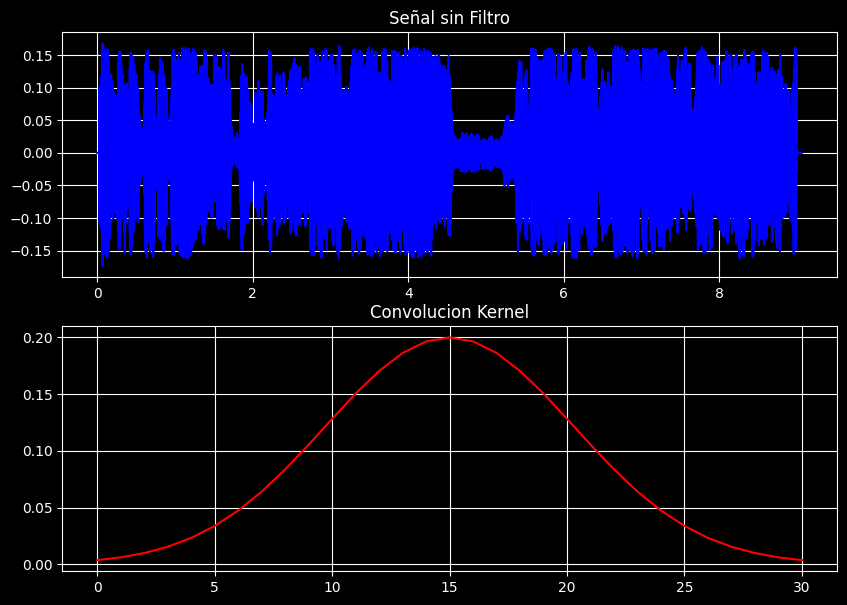

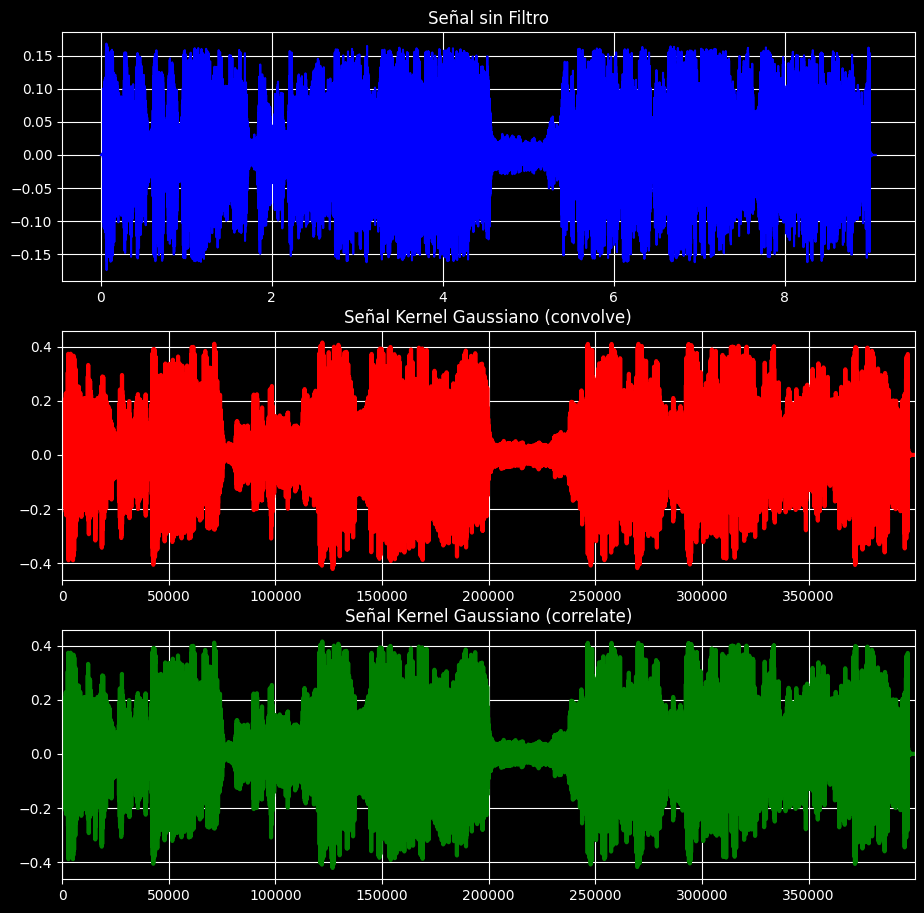

In [ ]:
import numpy as np
import soundfile
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl
plt.style.use(["dark_background"])

audio_signal, fm = soundfile.read("ardillas-cantando.wav")

t= np.arange(0, 9.06447, 1/fm) # variable independiente discreta

dimension_t=len(t)

audio_izquierdo=audio_signal[:, 0]

type(audio_signal)

h_n=0.2*np.exp(-np.linspace(-2,2,31)**2)
len_x=len(audio_izquierdo)
len_h=len(h_n)


plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(t,audio_izquierdo, "b")
plt.title("Señal sin Filtro")
#plt.xlim([0,len_x])
plt.grid(True)
plt.subplot(212)
plt.plot(h_n,'r')
plt.title("Convolucion Kernel")
#plt.xlim([0,len_x])
plt.grid(True)

y_n=np.convolve(audio_izquierdo,h_n)
y_n_2=np.correlate(audio_izquierdo,h_n)

plt.figure(figsize=(11,11))

plt.subplot(311)
plt.plot(t,audio_izquierdo, "b")
plt.title("Señal sin Filtro")
plt.grid(True)
plt.subplot(312)
plt.plot(y_n,"r", linewidth=3)
plt.title("Señal Kernel Gaussiano (convolve)")
plt.xlim([0,len_x])
plt.grid(True)
#plt.plot(x_n)
plt.subplot(313)
plt.plot(y_n_2,"g", linewidth=3)
plt.title("Señal Kernel Gaussiano (correlate)")
plt.xlim([0,len_x])
plt.grid(True)
plt.show()
soundfile.write("filtradoKG.wav", y_n,fm)
soundfile.write("filtrado_correlate.wav",y_n_2,fm)

In [ ]:
#Audio kernel Gaussiano
audiofilKG_path = "filtradoKG.wav"
Audio(audiofilKG_path)

In [ ]:
#Audio correlate Gaussiano
audiofilco_path = "filtrado_correlate.wav"
Audio(audiofilco_path)

#Responda ¿Que efecto sonoro identifica entre el audio original y el modificado?


Tiene el efecto de suavizar la señal y disminuir la intensidad de frecuencias altas, lo que conlleva a reducir el ruido y a eliminar detalles finos en el audio. Permite la reducción del ruido de fondo e imperfecciones del audio. Suaviza los sonidos agudos (alta frecuencia). Reducción de detalles finos, eliminando estos detalles hace que la señal suene más suave y menos detallada.

#**TEST DE COMPROBACIÓN**
#¿Si en el ejercicio 5a usa la función **correlate** en vez de **convolve** que diferencias en la forma y sonoras se tendría en la señal de salida?. Explique.

La principal diferencia entre "convolve" y "correlate" en el filtrado de audio se basa en cómo se dimensionan los resultados. Por ejemplo para la señal de "convolve" al realizar la convolución produce una señal de salida más larga que la señal de entrada, mientras que para el "correlate" es similar a la convolución pero para medir similitud produce una salida del mismo tamaño o más corta que la señal de entrada.